<a href="https://colab.research.google.com/github/vinybrasil/CiDAMO/blob/master/projeto_relmo/customers/KMEANS_COSSENO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram
import math

In [ ]:
data_semna = pd.read_csv("/content/drive/My Drive/projeto_relmo/DATA_SEMNA.csv") #sem o index_col
data_semna

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
406824,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
cluster_output = pd.read_csv("/content/drive/My Drive/projeto_relmo/produtos_clusterizado_cosseno.csv",index_col=0)
cluster_output



,produtos,cluster,produtos_cleaned
0,WHITE HANGING HEART T-LIGHT HOLDER,1,heart holder
1,WHITE METAL LANTERN,2,metal lantern
2,CREAM CUPID HEARTS COAT HANGER,3,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,4,union flag water bottle
4,RED WOOLLY HOTTIE WHITE HEART.,5,heart
...,...,...,...
3891,"LETTER ""W"" BLING KEY RING",276,letter w ring
3892,"LETTER ""Z"" BLING KEY RING",276,letter ring
3893,PINK CRYSTAL SKULL PHONE CHARM,338,skull phone charm
3894,CREAM HANGING HEART T-LIGHT HOLDER,1,heart holder


In [ ]:
max(cluster_output['cluster'])

458

In [ ]:
print("Lendo customers...\n")
i = 0
customers = []

for item in data_semna['CustomerID'].values:
    if item not in customers:
        customers.append(item)
    #print("Analisando o ", i, " cliente de ", len(data_semna['CustomerID'].values))
    i += 1

Lendo customers...



In [ ]:
produtos = pd.read_csv('/content/drive/My Drive/projeto_relmo/produtos.csv',index_col=0)
produtos

,produtos
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3891,"LETTER ""W"" BLING KEY RING"
3892,"LETTER ""Z"" BLING KEY RING"
3893,PINK CRYSTAL SKULL PHONE CHARM
3894,CREAM HANGING HEART T-LIGHT HOLDER


In [ ]:
j = 0
clusters = []
for cluster in cluster_output['cluster'].values:
    if cluster not in clusters:
        clusters.append(cluster)
    #print("Analisando o ", j, " produto de ", len(cluster_output['cluster'].values))
    j += 1
len(clusters)

459

In [ ]:
novo_df = pd.DataFrame(index=customers, columns=clusters)
novo_df = novo_df.fillna(0)
novo_df

,1,2,3,4,5,6,7,8,9,10,0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458
17850.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13047.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12583.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13748.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13298.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14569.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
z = 0
while z < len(data_semna):
    #print('Lendo ', z, ' de ', len(data_semna) - 1, ' registros.')
    cliente = data_semna['CustomerID'][z]
    
    produto = data_semna['Description'][z]
    quantidade = data_semna['Quantity'][z]
    #print(quantidade)
    cluster = cluster_output[cluster_output['produtos'] == produto]['cluster'].values
    if len(cluster) == 1:
        cluster_id = sum(cluster)
        #if (novo_df[cluster_id][cliente] == 0):
        novo_df[cluster_id][cliente] += quantidade
        #    novo_df[cluster_id][cliente] += 1
        #else:
        #    pass
    else:
        print("algo deu ruim")
    z += 1
novo_df

,1,2,3,4,5,6,7,8,9,10,0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458
17850.0,122,122,108,110,104,42,100,108,108,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,66,96,82,96,48,50,172,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13047.0,23,0,0,0,0,0,0,6,0,32,75,12,17,6,35,13,36,4,42,9,0,0,0,0,0,0,0,0,0,0,0,6,12,0,0,0,0,1,0,0,...,9,24,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12583.0,0,0,0,0,0,0,0,0,0,0,1131,0,0,0,0,0,0,0,0,0,82,200,168,36,18,114,132,20,96,192,256,396,0,0,0,0,0,0,0,0,...,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,0,0,0,0,0
13748.0,0,0,0,0,4,0,0,0,0,0,5,0,0,0,6,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,120,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0
15100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13298.0,0,0,0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14569.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
soma = novo_df.sum(axis=1)

In [ ]:
soma

17850.0    1693
13047.0    1355
12583.0    5009
13748.0     439
15100.0      58
           ... 
13436.0      76
15520.0     314
13298.0      96
14569.0      79
12713.0     508
Length: 4372, dtype: int64

In [ ]:
import sklearn
from sklearn.preprocessing import normalize
X = novo_df.to_numpy()
normalizado = novo_df.div(novo_df.sum(axis=1), axis=0)

In [ ]:
normalizado_df = pd.DataFrame(normalizado, index=customers, columns=clusters)
normalizado_df

,1,2,3,4,5,6,7,8,9,10,0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458
17850.0,0.072061,0.072061,0.063792,0.064973,0.061429,0.024808,0.059067,0.063792,0.063792,0.000000,0.000000,0.000000,0.000000,0.010041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053160,0.000000,0.038984,0.056704,0.048435,0.056704,0.028352,0.029533,0.101595,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
13047.0,0.016974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004428,0.000000,0.023616,0.055351,0.008856,0.012546,0.004428,0.025830,0.009594,0.026568,0.002952,0.030996,0.006642,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004428,0.008856,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,...,0.006642,0.017712,0.0,0.0,0.000000,0.0,0.0,0.0,0.005904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008856,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
12583.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016371,0.039928,0.03354,0.007187,0.003594,0.022759,0.026353,0.003993,0.019166,0.038331,0.051108,0.079058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.002995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002396,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.015971,0.0,0.0,0.0,0.0,0.0,0.0
13748.0,0.000000,0.000000,0.000000,0.000000,0.009112,0.000000,0.000000,0.000000,0.000000,0.000000,0.011390,0.000000,0.000000,0.000000,0.013667,0.000000,0.000000,0.000000,0.027335,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05467,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078947,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
soma = normalizado_df.sum(axis=1)
soma

17850.0    1.0
13047.0    1.0
12583.0    1.0
13748.0    1.0
15100.0    1.0
          ... 
13436.0    1.0
15520.0    1.0
13298.0    1.0
14569.0    1.0
12713.0    1.0
Length: 4372, dtype: float64

In [ ]:
normalizado_df.to_csv('/content/drive/My Drive/projeto_relmo/df_500_cosseno_normalizado.csv')
normalizado_df

,1,2,3,4,5,6,7,8,9,10,0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458
17850.0,0.072061,0.072061,0.063792,0.064973,0.061429,0.024808,0.059067,0.063792,0.063792,0.000000,0.000000,0.000000,0.000000,0.010041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053160,0.000000,0.038984,0.056704,0.048435,0.056704,0.028352,0.029533,0.101595,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
13047.0,0.016974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004428,0.000000,0.023616,0.055351,0.008856,0.012546,0.004428,0.025830,0.009594,0.026568,0.002952,0.030996,0.006642,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004428,0.008856,0.000000,0.000000,0.000000,0.000000,0.000738,0.000000,0.000000,...,0.006642,0.017712,0.0,0.0,0.000000,0.0,0.0,0.0,0.005904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008856,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
12583.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.225794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016371,0.039928,0.03354,0.007187,0.003594,0.022759,0.026353,0.003993,0.019166,0.038331,0.051108,0.079058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.002995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002396,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.015971,0.0,0.0,0.0,0.0,0.0,0.0
13748.0,0.000000,0.000000,0.000000,0.000000,0.009112,0.000000,0.000000,0.000000,0.000000,0.000000,0.011390,0.000000,0.000000,0.000000,0.013667,0.000000,0.000000,0.000000,0.027335,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05467,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.026316,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078947,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


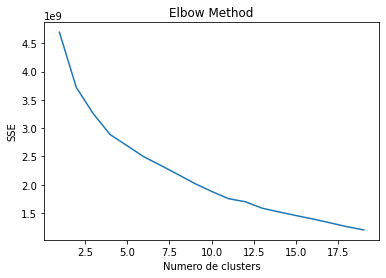

<Figure size 432x288 with 0 Axes>

In [ ]:

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=25, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(i)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Numero de clusters')
plt.ylabel('SSE')
plt.show()
plt.savefig("/content/drive/My Drive/projeto_relmo/kmeans_cosseno.png")

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

n = optimal_number_of_clusters(wcss)
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=600, n_init=25, random_state=0)
kmeans.fit(X)
y = kmeans.predict(X)
print(n, len(y))

7 4372


In [ ]:
predito = pd.DataFrame(y, index=novo_df.index, columns=['cluster_predito'])
predito.to_csv("/content/drive/My Drive/projeto_relmo/predito_cosseno.csv")

In [ ]:
predito

,cluster_predito
17850.0,0
13047.0,0
12583.0,0
13748.0,0
15100.0,0
...,...
13436.0,0
15520.0,0
13298.0,0
14569.0,0


In [ ]:
predito['cluster_predito'].value_counts()

0    4353
2      14
3       1
6       1
5       1
1       1
4       1
Name: cluster_predito, dtype: int64